<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Debere/clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
countries=pd.read_csv("countries of the world (2).csv")
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [28]:
columns_c=['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']
countries[columns_c] = countries[columns_c].replace(',', '.', regex=True)
countries[columns_c] = countries[columns_c].astype(float)
countries[columns_c] = countries[columns_c].fillna(countries[columns_c].mean())

countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


In [30]:
from sklearn.preprocessing import StandardScaler

# Tworzenie instancji obiektu StandardScaler
scaler = StandardScaler()

# Normalizacja danych
countries[columns_c] = scaler.fit_transform(countries[columns_c])
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),0.019695,0.027583,-0.199844,-0.293443,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075,1.619132e+00,-3.211494e-01,-1.158818e+00
1,Albania,EASTERN EUROPE,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-0.814901,5.734169e-01,-7.121448e-01,8.579033e-02
2,Algeria,NORTHERN AFRICA,0.035618,0.998421,-0.220490,-0.292889,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-0.938514,-3.521823e-01,2.385742e+00,-1.671672e+00
3,American Samoa,OCEANIA,-0.243834,-0.334779,-0.053514,0.514709,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057,3.912680e-17,5.086484e-17,-6.395910e-16
4,Andorra,WESTERN EUROPE,-0.243720,-0.334629,-0.137002,-0.293443,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-0.606178,3.912680e-17,5.086484e-17,-6.395910e-16


In [31]:
from sklearn.cluster import KMeans

# Tworzenie instancji obiektu KMeans z 3 klastrami
kmeans = KMeans(n_clusters=3)

# Dopasowanie modelu do znormalizowanych danych
kmeans.fit(countries[columns_c])

# Przewidywanie klastrów dla danych
countries['Cluster'] = kmeans.predict(countries[columns_c])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

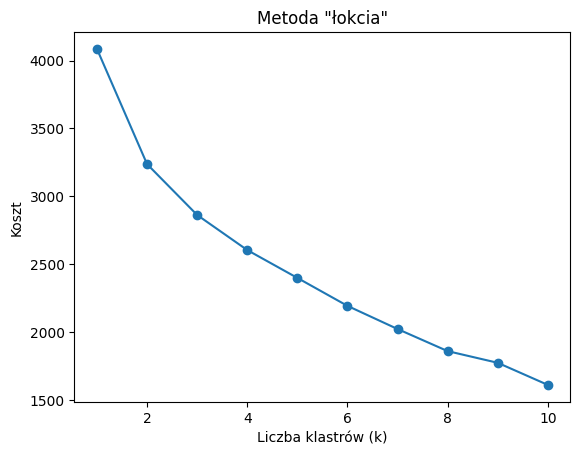

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista kosztów dla różnych wartości k
costs = []

# Przetestuj różne wartości k od 1 do 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(countries[columns_c])
    costs.append(kmeans.inertia_)

# Wykres "łokcia" - kosztu w zależności od liczby klastrów
plt.plot(range(1, 11), costs, marker='o')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Koszt')
plt.title('Metoda "łokcia"')
plt.show()
